In [113]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
%matplotlib inline

In [34]:
raw_freq = pd.ExcelFile('FrequencyData1.xlsx')

data_freq = raw.parse('Sheet1', header=None)

raw_lbl = pd.ExcelFile('LabelNameData1.xlsx')

data_lbl = raw_lbl.parse('Sheet1', header=None)

lbls_cont_arousal = data_lbl[1]

1280

In [45]:
lbls_disc_arousal = np.zeros(len(lbls_cont_arousal))

for i,lbls in enumerate(np.asarray(lbls_cont_arousal)):
    if lbls > 5.5:
        lbls_disc_arousal[i] = 1        

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_freq, lbls_disc_arousal, test_size = 0.2)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1.

In [49]:
C_range = np.logspace(start=-9, stop=2, base=10)
gamma_range = np.logspace(start=-9, stop=3, base=10)
params = dict(gamma=gamma_range, C=C_range)

svc = SVC(kernel='rbf')

svc_grid = GridSearchCV(estimator=svc, param_grid=params, cv=10)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-09, 1.75751e-09, 3.08884e-09, 5.42868e-09, 9.54095e-09,
       1.67683e-08, 2.94705e-08, 5.17947e-08, 9.10298e-08, 1.59986e-07,
       2.81177e-07, 4.94171e-07, 8.68511e-07, 1.52642e-06, 2.68270e-06,
       4.71487e-06, 8.28643e-06, 1.45635e-05, 2.55955e-05, 4.49... 4.49843e+00, 7.54312e+00,
       1.26486e+01, 2.12095e+01, 3.55648e+01, 5.96362e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
y_pred = svc_grid.best_estimator_.predict(X_test)

print('---------------- Accuracy: % .2f ----------------' % svc_grid.best_score_)
print('---------------- ROC AUC Score: % .2f -----------------' % metrics.roc_auc_score(y_test, y_pred))
print('-------------- Classification Scores for best params: {} --------------'.format(svc_grid.best_params_))
print(metrics.classification_report(y_test, y_pred, target_names=['Active', 'Inactive']))

---------------- Accuracy:  0.62 ----------------
---------------- ROC AUC Score:  0.62 -----------------
-------------- Classification Scores for best params: {'C': 100.0, 'gamma': 3.088843596477485e-09} --------------
             precision    recall  f1-score   support

     Active       0.61      0.73      0.67       131
   Inactive       0.65      0.51      0.57       125

avg / total       0.63      0.62      0.62       256



TN: 96 FP: 35 FN: 61 TP: 64


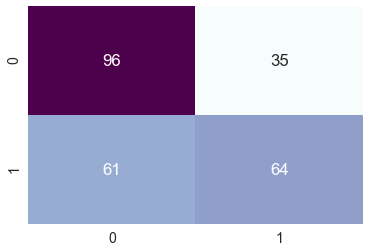

In [208]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('TN: {} FP: {} FN: {} TP: {}'.format(tn, fp, fn, tp))
cfm = pd.DataFrame(data=metrics.confusion_matrix(y_test, y_pred))
sn.set(font_scale=1.4)
sn.heatmap(cfm, annot=True, cmap="BuPu", cbar=False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please 

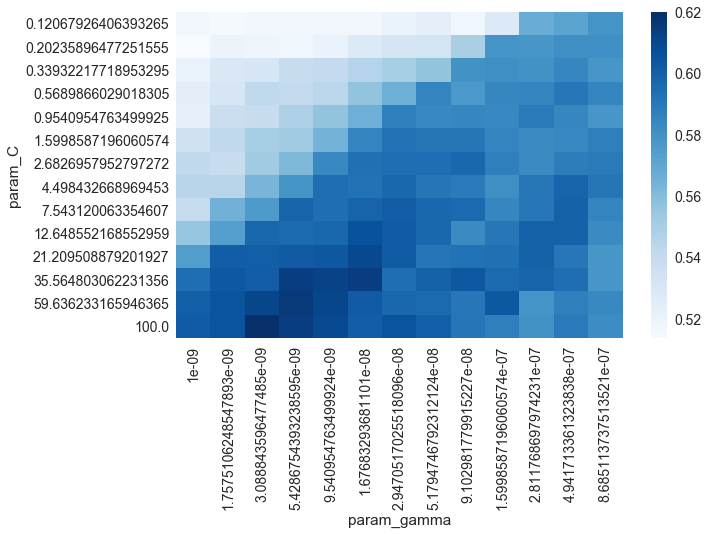

In [207]:
pd.options.display.float_format = '${:,.2f}'.format
scores = pd.DataFrame(svc_grid.cv_results_)
pvt = pd.pivot_table(scores.query('param_C > 0.1 and param_gamma < 0.000001'), values='mean_test_score', 
                     index='param_C', columns='param_gamma')

plt.figure(figsize=(10,6))
sn.heatmap(pvt, cmap="Blues")